# CrossOver & Mutation Probability

In [45]:
from geneticAlgorithm.Genetic import *
problem = Multiple_knapsack("Sources_Files/test10x10.in")
knapsacks = problem.flat()
servers = problem.servers

In [ ]:

# servers=sorted(servers,key=lambda x:-x[1])
servers=sorted(problem.servers,key=lambda x:-x[1]/x[0])

# print("Place disponible : ",problem.shape[0]*problem.shape[1]-len(problem.indispo))
# 
popSize=100
nGen=100
crossOverDico={}
# 
for cxpb in np.linspace(0.4,0.6,5):
    subList=[]
    for mutpb in np.linspace(0.4,0.6,5):
        gen,maxList=scoreModel(servers,knapsacks,cxpb=cxpb,mutpb=mutpb,popSize=popSize,nGen=nGen)
        bestInd=np.max(maxList)
        print(cxpb,mutpb,bestInd)
        subList.append((mutpb,bestInd))    
    crossOverDico[cxpb]=subList

/home/chivunito/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/home/chivunito/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


0.4 0.4 399.0


0.4 0.45 426.0


0.4 0.5 413.0


0.4 0.55 410.0


0.4 0.6 413.0


0.45 0.4 419.0


0.45 0.45 403.0


0.45 0.5 409.0


0.45 0.55 417.0


0.45 0.6 412.0


0.5 0.4 398.0


0.5 0.45 407.0


0.5 0.5 425.0


0.5 0.55 393.0


0.5 0.6 417.0


0.55 0.4 416.0


0.55 0.45 427.0


0.55 0.5 402.0


0.55 0.55 413.0


0.55 0.6 399.0


0.6 0.4 410.0


0.6 0.45 402.0


0.6 0.5 402.0


0.6 0.55 416.0


0.6 0.6 396.0


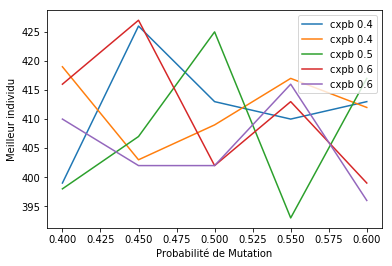

In [22]:
for cxpb,subList in crossOverDico.items():
   subList=np.array(subList)
   plt.plot(subList[:,0],subList[:,1], label="cxpb "+str(round(cxpb,1)))
plt.legend()
plt.xlabel('Probabilité de Mutation')
plt.ylabel('Meilleur individu')
plt.savefig("tes.png",dpi=800)
plt.show()
    

# Différents sort sur les serveurs

In [49]:
mutpb=0.45
cxpb=0.6
popSize=20
nGen=100

resultDico={}
problem = Multiple_knapsack("Sources_Files/test10x50.in")
knapsacks = problem.flat()
servers = problem.servers

# Not Sorted
resultDico['Not Sorted']=scoreModel(servers,knapsacks,cxpb=cxpb,mutpb=mutpb,popSize=popSize,nGen=nGen)

# par puissance
servers=sorted(servers,key=lambda x:-x[1])
resultDico['Puissance décroissante']=scoreModel(servers,knapsacks,cxpb=cxpb,mutpb=mutpb,popSize=popSize,nGen=nGen)
servers=sorted(servers,key=lambda x:x[1])
resultDico['Puissance croissante']=scoreModel(servers,knapsacks,cxpb=cxpb,mutpb=mutpb,popSize=popSize,nGen=nGen)

# par ratio
servers=sorted(problem.servers,key=lambda x:-x[1]/x[0])
resultDico['Puissance/size décroissante']=scoreModel(servers,knapsacks,cxpb=cxpb,mutpb=mutpb,popSize=popSize,nGen=nGen)

# par taille 
servers=sorted(problem.servers,key=lambda x:x[0])
resultDico['size croissante']=scoreModel(servers,knapsacks,cxpb=cxpb,mutpb=mutpb,popSize=popSize,nGen=nGen)

/home/chivunito/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/home/chivunito/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


Not Sorted
Puissance décroissante
Puissance croissante
Puissance/size décroissante
size croissante


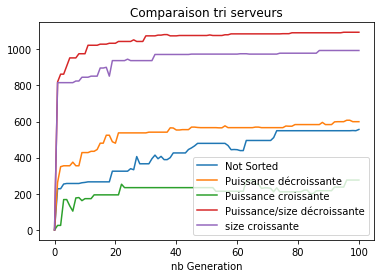

In [51]:
for result,(gen,maxList,_,_) in resultDico.items():
    print(result)
    plt.plot(gen,maxList,label=result)
plt.legend()
plt.title("Comparaison tri serveurs")
plt.xlabel('nb Generation')
plt.savefig('test.png',dpi=800)
plt.show()


# Comparaison Type de mutation

In [59]:
mutpb=0.45
cxpb=0.6
popSize=20
nGen=200

# Mutation normale
resultDico={}
problem = Multiple_knapsack("Sources_Files/test10x10.in")
knapsacks = problem.flat()
servers = problem.servers
servers=sorted(problem.servers,key=lambda x:-x[1]/x[0])

resultDico['Mutation V2']=scoreModel(servers,knapsacks,cxpb=cxpb,mutpb=mutpb,popSize=popSize,nGen=nGen)


/home/chivunito/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/home/chivunito/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [78]:
from geneticAlgorithm.Genetic import *
nGen=1000
problem = Multiple_knapsack("Sources_Files/test10x10.in")
knapsacks = problem.flat()
servers = problem.servers
servers=sorted(problem.servers,key=lambda x:-x[1]/x[0])

resultDico['Mutation V1']=scoreModel(servers,knapsacks,cxpb=cxpb,mutpb=mutpb,popSize=popSize,nGen=nGen)


/home/chivunito/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/home/chivunito/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


2
Mutation V2 (404,)
Mutation V1 (399,)


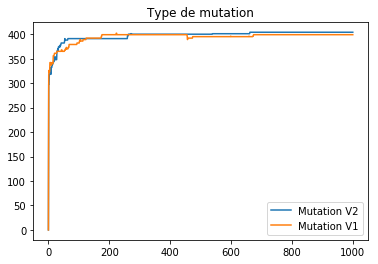

In [80]:
print(len(resultDico))
for result,(gen,maxList,t1,t2) in resultDico.items():
    print(result,t2)
    plt.plot(gen,maxList,label=result)
plt.legend()
plt.title("Type de mutation")
plt.savefig('test.png',dpi=800)
plt.show()

## Final Benchmarking

fileName="test10x10.in"
problem = Multiple_knapsack("Sources_Files/"+fileName)
knapsacks = problem.flat()

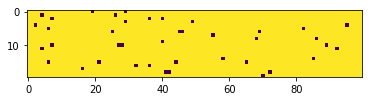

In [85]:
fileName="test20x100.in"
problem = Multiple_knapsack("Sources_Files/"+fileName)
knapsacks = problem.flat()
servers = problem.servers
servers=sorted(problem.servers,key=lambda x:-x[1]/x[0])
problem.plot()

/home/chivunito/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/home/chivunito/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	avg	min	max
0  	10    	0  	0  	0  


1  	7     	3729.6	0  	12529


2  	6     	4925  	0  	12529


3  	10    	7459.6	0  	12533


4  	7     	7518.2	0  	12533


5  	9     	7517.8	0  	12533


6  	8     	6343.6	0  	13316


7  	7     	5090.7	0  	13316


8  	4     	8936.7	0  	13402


9  	7     	5099.3	0  	13402


10 	6     	6352.6	0  	13402


11 	8     	3759.1	0  	12533


12 	9     	8978.4	0  	13683


13 	9     	5220.5	0  	13683


14 	10    	2595.1	0  	13663


15 	4     	6609.2	0  	14190


16 	8     	4151.6	0  	14190


17 	8     	5504.3	0  	14190


18 	10    	8359  	0  	14492


19 	8     	8347.3	0  	14289


20 	4     	8347.3	0  	14289


21 	8     	11130.6	0  	14289


22 	8     	11251.7	0  	14289


23 	9     	7090.5 	0  	14289


24 	6     	7124   	0  	14624


25 	9     	4286.8 	0  	14290


26 	5     	5715.7 	0  	14290


27 	5     	8574   	0  	14290


28 	6     	7145   	0  	14290


29 	8     	10003.9	0  	14299


30 	10    	5716.9 	0  	14299


31 	7     	5753.2 	0  	14662


32 	9     	4324.2 	0  	14662


33 	7     	4324.9 	0  	14662


34 	7     	7151   	0  	14336


35 	8     	2896.1 	0  	14663


36 	7     	5866.4 	0  	14750


37 	10    	5862.8 	0  	14712


38 	6     	8822.6 	0  	14713


39 	7     	5885   	0  	14713


40 	8     	4426.1 	0  	14836


41 	10    	10360.1	0  	14881


42 	7     	8897   	0  	14881


43 	8     	8910.6 	0  	14881


44 	9     	7423.2 	0  	14855


45 	8     	7460.5 	0  	15057


46 	10    	5973.9 	0  	15057


47 	10    	4508.6 	0  	15120


48 	9     	3024   	0  	15120


49 	10    	3033   	0  	15210


50 	9     	3041.7 	0  	15214


51 	4     	4537.6 	0  	15214


52 	7     	3019.3 	0  	15113


53 	8     	6052.1 	0  	15248


54 	8     	7560.3 	0  	15250


55 	9     	9089.5 	0  	15250


56 	10    	7622   	0  	15355


57 	8     	10682.5	0  	15355


58 	8     	4585.5 	0  	15355


59 	9     	3060.8 	0  	15355


60 	6     	9159.5 	0  	15355


61 	10    	4572.5 	0  	15253


62 	6     	6106.7 	0  	15342


63 	9     	7670.6 	0  	15406


64 	8     	7667.1 	0  	15406


65 	7     	7672.9 	0  	15406


66 	7     	12294.6	0  	15406


67 	4     	10771.4	0  	15406


68 	4     	7696.6 	0  	15406


69 	9     	6164.7 	0  	15429


70 	7     	4624.1 	0  	15429


71 	8     	3083.8 	0  	15432


72 	8     	3090   	0  	15494


73 	6     	4657   	0  	15538


74 	8     	4657   	0  	15538


75 	7     	12408.9	0  	15538


76 	3     	10872.3	0  	15538


77 	9     	7769   	0  	15538


78 	7     	4661.4 	0  	15538


79 	7     	3108.7 	0  	15571


80 	7     	3108.7 	0  	15571


81 	4     	3114.2 	0  	15571


82 	6     	7783.4 	0  	15578


83 	6     	9339.1 	0  	15578


84 	7     	7786.2 	0  	15585


85 	8     	7787.5 	0  	15633


86 	9     	9360.6 	0  	15633


87 	6     	9369.6 	0  	15633


88 	10    	7806.3 	0  	15633


89 	8     	6253.2 	0  	15633


90 	7     	4687.4 	0  	15633


91 	4     	7811.5 	0  	15633


92 	9     	6253.2 	0  	15633


93 	9     	10943.1	0  	15640


94 	5     	7817.9 	0  	15640


95 	7     	6253.2 	0  	15633


96 	5     	7816.5 	0  	15633


97 	6     	12506.4	0  	15633


98 	7     	4689.9 	0  	15633


99 	5     	7816.5 	0  	15633


100	9     	4690   	0  	15634


101	9     	1563.3 	0  	15633


102	8     	1563.3 	0  	15633


103	7     	3126.9 	0  	15636


104	8     	10946.8	0  	15645


105	7     	6257.1 	0  	15645


106	8     	6256.2 	0  	15648


107	8     	12503.8	0  	15648


108	6     	9388.6 	0  	15648


109	9     	10952  	0  	15648


110	7     	4694.4 	0  	15648


111	6     	7821.3 	0  	15652


112	4     	7818.2 	0  	15652


113	8     	6256.9 	0  	15652


114	7     	6260.4 	0  	15652


115	8     	6260.8 	0  	15652


116	7     	3130.4 	0  	15652


117	9     	6259.3 	0  	15652


118	8     	7824.5 	0  	15652


119	6     	9388.9 	0  	15652


120	9     	3129   	0  	15645


121	10    	10950.5	0  	15666


122	8     	10960.7	0  	15666


123	8     	7830.9 	0  	15666


124	10    	7830.9 	0  	15666


125	7     	12526.3	0  	15666


126	6     	7830.9 	0  	15666


127	6     	9397.5 	0  	15666


128	6     	7833   	0  	15666


129	9     	6266   	0  	15666


130	8     	1566.6 	0  	15666


131	9     	6267.1 	0  	15692


132	7     	7841.4 	0  	15692


133	9     	6277.7 	0  	15710


134	8     	4699.4 	0  	15689


135	8     	3137.8 	0  	15689


136	5     	6274.4 	0  	15689


137	10    	12547.2	0  	15691


138	8     	6275.8 	0  	15691


139	6     	9407.5 	0  	15691


140	8     	6269.5 	0  	15691


141	7     	3138.4 	0  	15693


142	9     	9416.6 	0  	15706


143	8     	10985.9	0  	15706


144	10    	6280.9 	0  	15706


145	6     	7851.5 	0  	15706


146	5     	6280.9 	0  	15706


147	4     	10992.7	0  	15706


148	8     	10990.4	0  	15706


149	8     	6282.6 	0  	15708


150	7     	4712   	0  	15708
test100x100.in;15708;79.64;1094;8753
FileName	score	Time	nbServers	totalSize
test100x100.in	15708	79.64	1094	8753


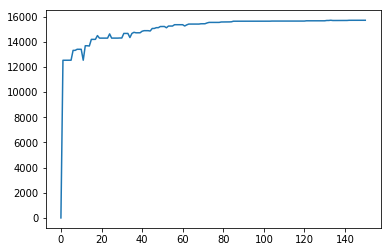

In [ ]:

import time

mutpb=0.5
cxpb=0.5
popSize=10
nGen=150

# Mutation normale
resultDico={}


startTime=time.time()
gen,max_,best,score=scoreModel(servers,knapsacks,cxpb=cxpb,mutpb=mutpb,popSize=popSize,nGen=nGen,verbose=True)
totalTime=time.time()-startTime

best=np.array(best)
servers=np.array(servers)
totalSize=sum(servers[best>-1][:,0])
totalServers=np.sum(np.array(best)>-1)

print(fileName,score[0],round(totalTime,2),totalServers,totalSize,sep=";")
print("FileName","score","Time","nbServers","totalSize",sep="\t")
print(fileName,score[0],round(totalTime,2),totalServers,totalSize,sep="\t")

plt.plot(gen,max_)
plt.show()
